``` Siddhant Gupta ```

In [312]:
library(tidyverse)
library(caret)
library(leaps) 
library(ggplot2)
library(dplyr)
library(ggthemes)
library(heplots)
library(candisc)
library(car)
library(klaR) # install.packages
library(MASS) 
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




#### a) Generate a data set with p = 25 features, n = 1,000 observations, and an associated quantitative response vector generated according to the model Y=βX+ϵ, where βhas some elements that are exactly equal to zero.

In [306]:
set.seed(1)
p = 25
n = 1000
x = matrix(rnorm(n*p),n,p)
beta <- rnorm(p)
beta[2] <- 0
beta[4] <- 0
beta[7] <- 0
beta[15] <- 0
beta[19] <- 0
epsilon <- rnorm(p)

y <- x%*%beta + epsilon



[1] 500  26

[1] 500  26

#### b) Split your data set into a training set containing 500 observations and a test set containing 500 observations.


In [309]:

data <- data.frame(y,x)

n.dat<-dim(data)[1]
set.seed(5)
rows<-sample(1:n.dat,n.dat/2)
test<-data[rows,]
dim(test)


[1] 500  26

In [310]:
train<-data[-rows,]
dim(train)

[1] 500  26

#### Perform subset selection (best, forward or backwards) on the training set, and plot the training and test MSE associated with the best model of each size.


Warning message in as.data.table.list(x, keep.rownames = keep.rownames, check.names = check.names, :
“Item 2 has 20 rows but longest item has 25; recycled with remainder.”


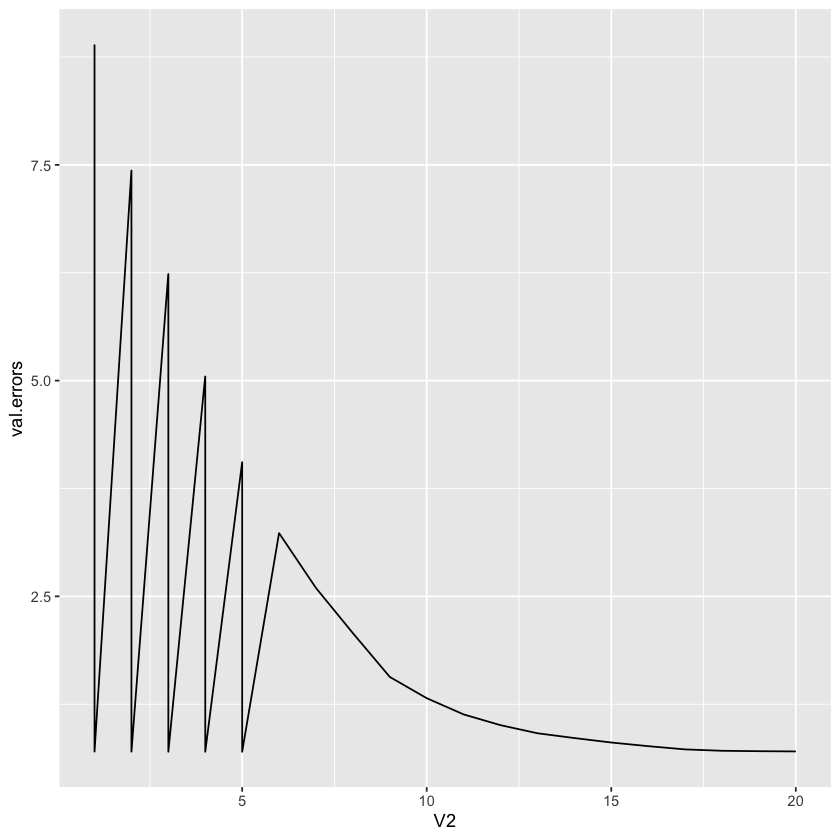

In [313]:
regfit.model = regsubsets(y ~ ., train,nvmax = p)
val.errors = rep(NA, p)
col.name = colnames(data)

#col.name <- col.name[-c(1)]
for (i in 1:p) {
    coefi = coef(regfit.model, id = i)
    pred = as.matrix(train[, col.name %in% names(coefi)]) %*% coefi[names(coefi) %in% 
        col.name]
    val.errors[i] = mean((train$y - pred)^2)
}
library(ggplot2)
dt.val.errors <- data.table(val.errors,seq(1:20))

ggplot(dt.val.errors, aes(x=V2,y=val.errors)) + geom_line()

Warning message in as.data.table.list(x, keep.rownames = keep.rownames, check.names = check.names, :
“Item 1 has 20 rows but longest item has 25; recycled with remainder.”


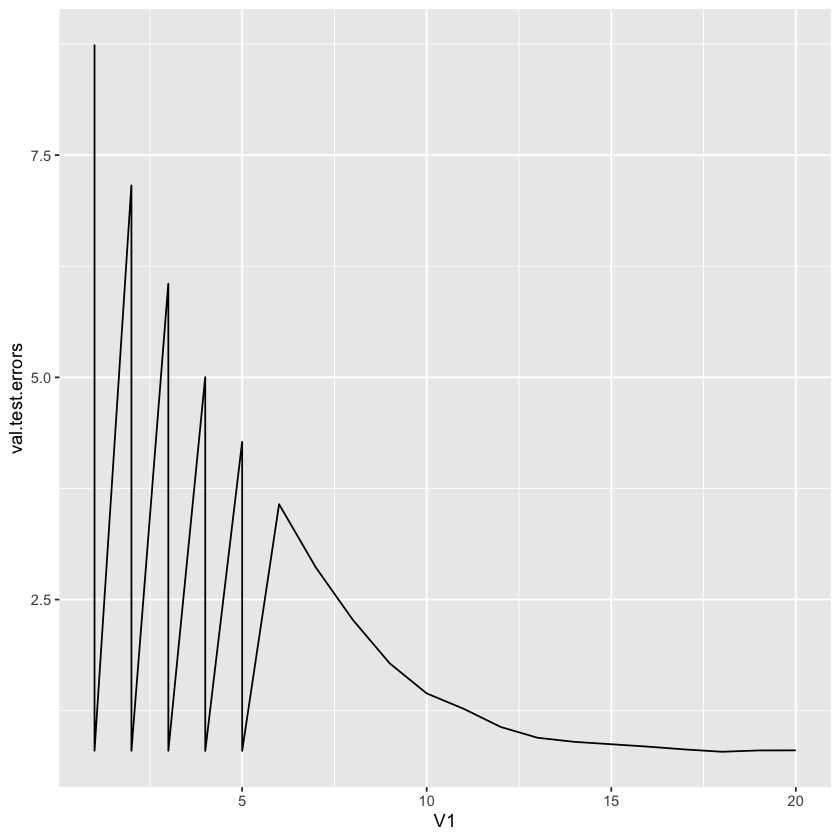

In [314]:
val.test.errors = rep(NA, p)
for (i in 1:p) {
    coefi = coef(regfit.model, id = i)
    pred = as.matrix(test[, col.name %in% names(coefi)]) %*% coefi[names(coefi) %in% 
        col.name]
    val.test.errors[i] = mean((test$y - pred)^2)
}

dt.val.test.errors <- data.table(seq(1:20),val.test.errors)

ggplot(dt.val.test.errors, aes(V1,val.test.errors)) + geom_line()



In [315]:
### Best Model

In [316]:
which.min(val.test.errors)

[1] 18

```
So No. of variables should be 18 for the best fit . 
```

(Intercept)            X1            X3            X5            X6 
 0.0004510785  0.1910891192  1.1584197915  0.7722314481  0.4875961181 
           X8           X10           X11           X12           X13 
 0.5712209284  0.7279447671  1.8374714551  0.8136433432  0.2328966559 
          X14           X16           X17           X18           X20 
-0.1277327900  0.3151299594 -0.2267535546  0.3861087251  1.0479122675 
          X21           X22           X24           X25 
 1.1730887046  0.9361090170  0.2351999719  0.8532134763


#### d) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept a model containing all the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size




In [318]:
which.min(val.test.errors)

[1] 18

```
We would get the most robust type of model with min noise if we reduce the variables to 18.
```

#### e) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [319]:
coef(regfit.model, id =18)

(Intercept)            X1            X3            X5            X6 
 0.0004510785  0.1910891192  1.1584197915  0.7722314481  0.4875961181 
           X8           X10           X11           X12           X13 
 0.5712209284  0.7279447671  1.8374714551  0.8136433432  0.2328966559 
          X14           X16           X17           X18           X20 
-0.1277327900  0.3151299594 -0.2267535546  0.3861087251  1.0479122675 
          X21           X22           X24           X25 
 1.1730887046  0.9361090170  0.2351999719  0.8532134763

In [321]:
coef(regfit.model, id =25)

(Intercept)            X1            X2            X3            X4 
-0.0006446714  0.1909199914 -0.0459539823  1.1623464112 -0.0690950563 
           X5            X6            X7            X8            X9 
 0.7848965411  0.4865431492 -0.0250250542  0.5698704268  0.0287052357 
          X10           X11           X12           X13           X14 
 0.7280201368  1.8363173536  0.8155843543  0.2379541438 -0.1251637037 
          X15           X16           X17           X18           X19 
-0.0209825024  0.3096171443 -0.2284756452  0.3941972860  0.0203820330 
          X20           X21           X22           X23           X24 
 1.0431078025  1.1643831038  0.9445701702  0.0417482522  0.2337030851 
          X25 
 0.8572104181

``` Many of the coeff values near to zero in full model or if we take all variables.```

In [322]:
min(val.test.errors)

[1] 0.7876415

In [328]:
val.test.errors[25]

[1] 0.7978924

``` We can clearly see that MSE value is lesser at 18 var compared to full model.```

#### f) Create a plot containing 􏰁􏰀pm=1(βj − βˆjm)2 for a range of values i, where βˆjm is the jth coefficient estimate for the best model containing m coefficient estimates. Comment on what you observe.

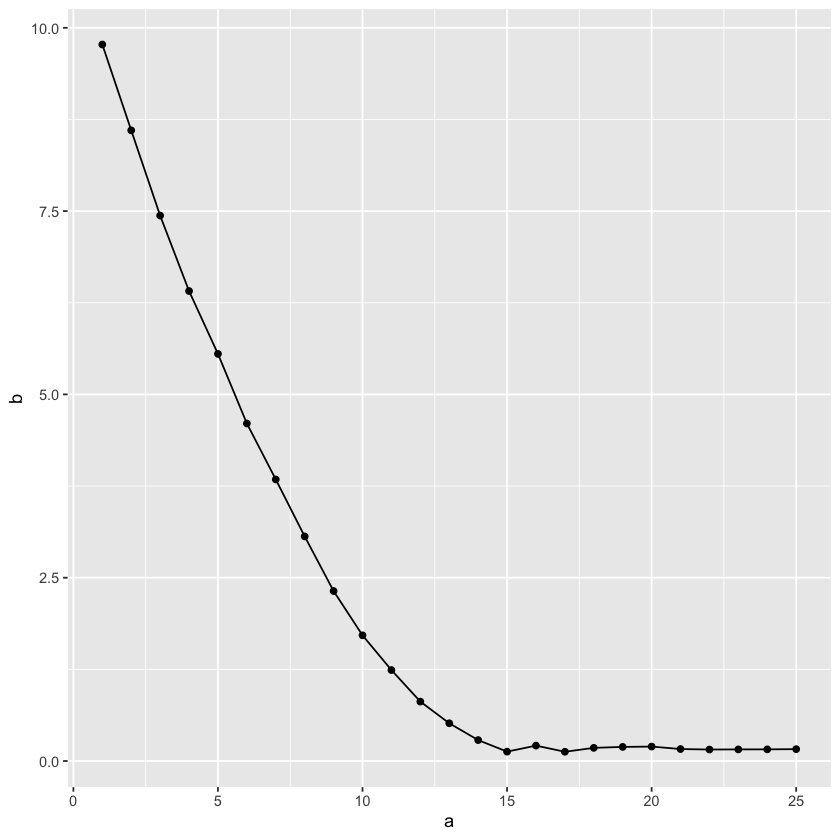

In [329]:
val.errors.g = rep(NA, p)
a = rep(NA, p)
b = rep(NA, p)
col.name <- col.name[-c(1)]
for (i in 1:p) {
    coefi = coef(regfit.model, id = i)
    a[i] = length(coefi) - 1
    b[i] = sqrt(sum((beta[col.name %in% names(coefi)] - coefi[names(coefi) %in% col.name])^2) + 
        sum(beta[!(col.name %in% names(coefi))])^2)
}

a.b <- data.table(a,b,keep.rownames = TRUE)
ggplot(a.b, aes(a,b)) + geom_point() + geom_line()

``` there is a significant drop of error till 15 after that not a lot .```

```
2. Consider the Diabetes dataset (posted with assignment).
Assume the population prior proba- bilities are estimated using the relative frequencies of the classes in the data.
```


#### (a) Produce pairwise scatterplots for all five variables, with different symbols or colors rep- resenting the three different classes. Do you see any evidence that the classes may have difference covariance matrices? That they may not be multivariate normal?

In [279]:
data(Diabetes)


In [280]:
head(Diabetes)

,relwt,glufast,glutest,instest,sspg,group
,<dbl>,<int>,<int>,<int>,<int>,<fct>
1,0.81,80,356,124,55,Normal
2,0.95,97,289,117,76,Normal
3,0.94,105,319,143,105,Normal
4,1.04,90,356,199,108,Normal
5,1.00,90,323,240,143,Normal
6,0.76,86,381,157,165,Normal


In [281]:
dats <- as.matrix(Diabetes)

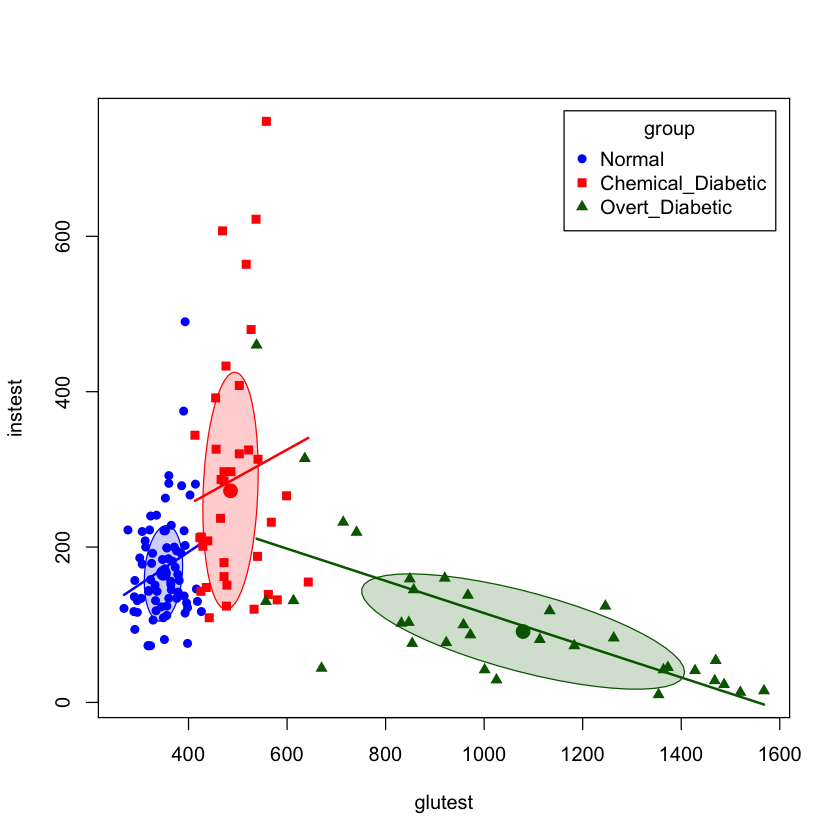

In [282]:
scatterplot( instest ~ glutest | group, data=Diabetes, 
             pch=c(16,15,17), 
             col=c("blue", "red", "darkgreen"),
             smooth=FALSE, 
             grid=FALSE, 
             legend=list(coords="topright"), 
             lwd=2,
             ellipse=list(levels=0.5))

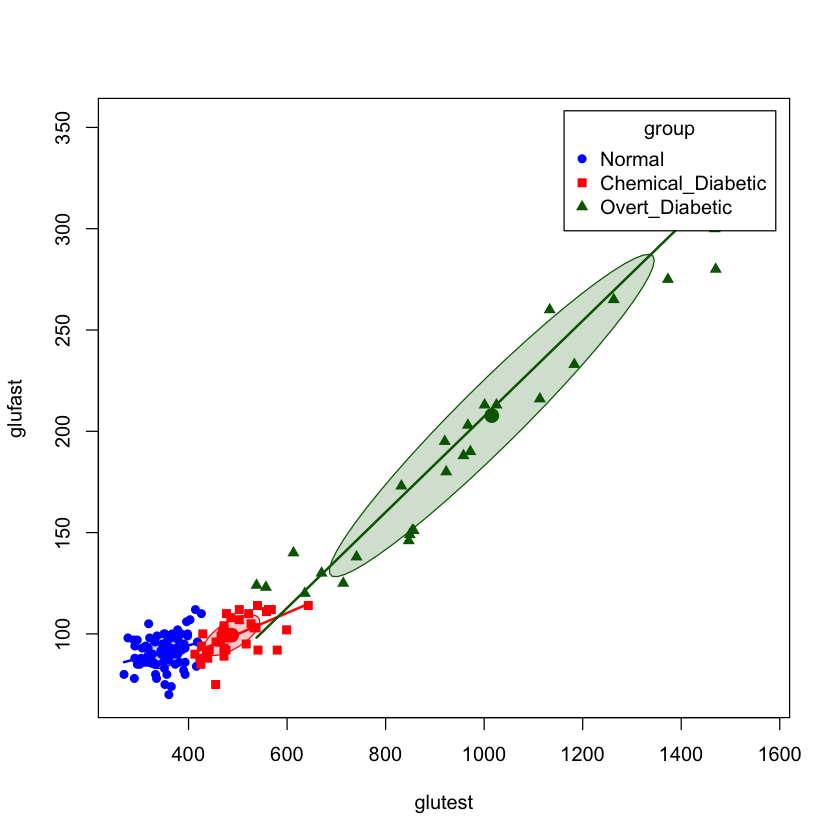

In [283]:
scatterplot( glufast ~ glutest | group, data=Diabetes, 
             pch=c(16,15,17), 
             col=c("blue", "red", "darkgreen"),
             smooth=FALSE, 
             grid=FALSE, 
             legend=list(coords="topright"), 
             lwd=2,
             ellipse=list(levels=0.5))

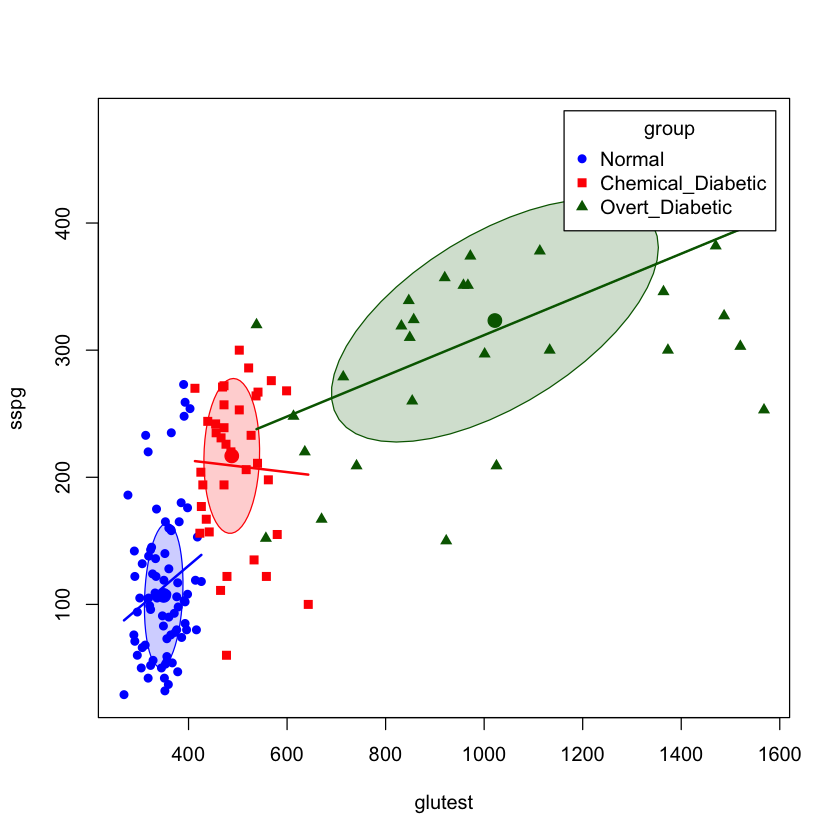

In [284]:
scatterplot( sspg ~ glutest | group, data=Diabetes, 
             pch=c(16,15,17), 
             col=c("blue", "red", "darkgreen"),
             smooth=FALSE, 
             grid=FALSE, 
             legend=list(coords="topright"), 
             lwd=2,
             ellipse=list(levels=0.5))

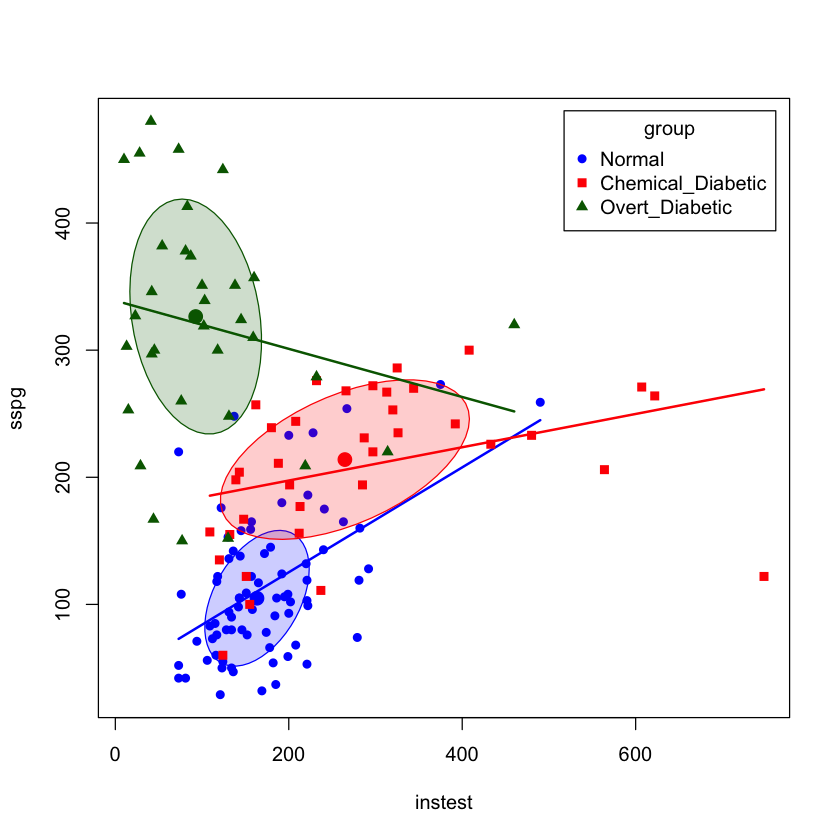

In [285]:
scatterplot( sspg ~ instest | group, data=Diabetes, 
             pch=c(16,15,17), 
             col=c("blue", "red", "darkgreen"),
             smooth=FALSE, 
             grid=FALSE, 
             legend=list(coords="topright"), 
             lwd=2,
             ellipse=list(levels=0.5))

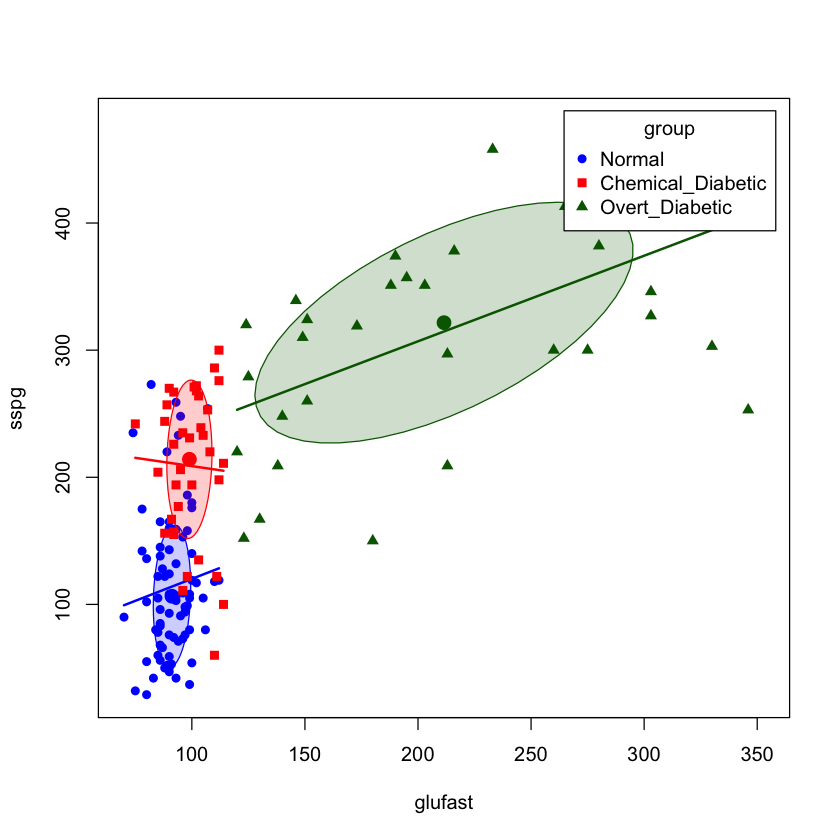

In [286]:
scatterplot( sspg~ glufast | group, data=Diabetes, 
             pch=c(16,15,17), 
             col=c("blue", "red", "darkgreen"),
             smooth=FALSE, 
             grid=FALSE, 
             legend=list(coords="topright"), 
             lwd=2,
             ellipse=list(levels=0.5))

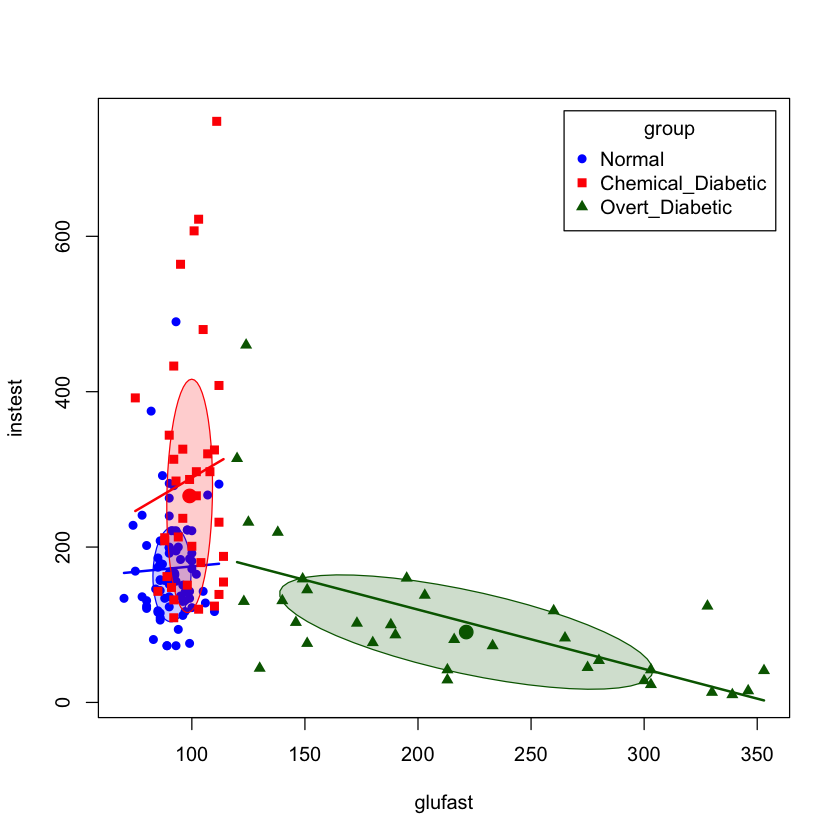

In [287]:
scatterplot( instest~ glufast | group, data=Diabetes, 
             pch=c(16,15,17), 
             col=c("blue", "red", "darkgreen"),
             smooth=FALSE, 
             grid=FALSE, 
             legend=list(coords="topright"), 
             lwd=2,
             ellipse=list(levels=0.5))

``` I can't see any evidence that the classes may have difference covariance matrices.```

#### (b) Apply linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA). How does the performance of QDA compare to that of LDA in this case?


In [288]:
# Create a test and training set
set.seed(123)
indis <- sample(1:nrow(Diabetes), round(2/3*nrow(Diabetes)), replace = FALSE)

dib_train <- Diabetes[indis, ]
dib_test <- Diabetes[-indis, ]
dim(dib_train)
dim(dib_test)


[1] 97  6

[1] 48  6

In [289]:
library(MASS)
lda.fit <- lda(group~., data = dib_train)
lda.fit


Call:
lda(group ~ ., data = dib_train)

Prior probabilities of groups:
           Normal Chemical_Diabetic    Overt_Diabetic 
        0.5257732         0.2061856         0.2680412 

Group means:
                      relwt   glufast   glutest   instest     sspg
Normal            0.9333333  90.70588  349.9608 183.94118 122.9608
Chemical_Diabetic 1.0770000 101.60000  507.1000 332.45000 220.3500
Overt_Diabetic    0.9742308 220.34615 1055.1538  87.57692 315.7308

Coefficients of linear discriminants:
                 LD1           LD2
relwt    1.740195087 -4.3104727464
glufast -0.029474300  0.0254809143
glutest  0.011745960 -0.0055612909
instest -0.001458224 -0.0071136677
sspg     0.002760410  0.0007069769

Proportion of trace:
   LD1    LD2 
0.8573 0.1427 

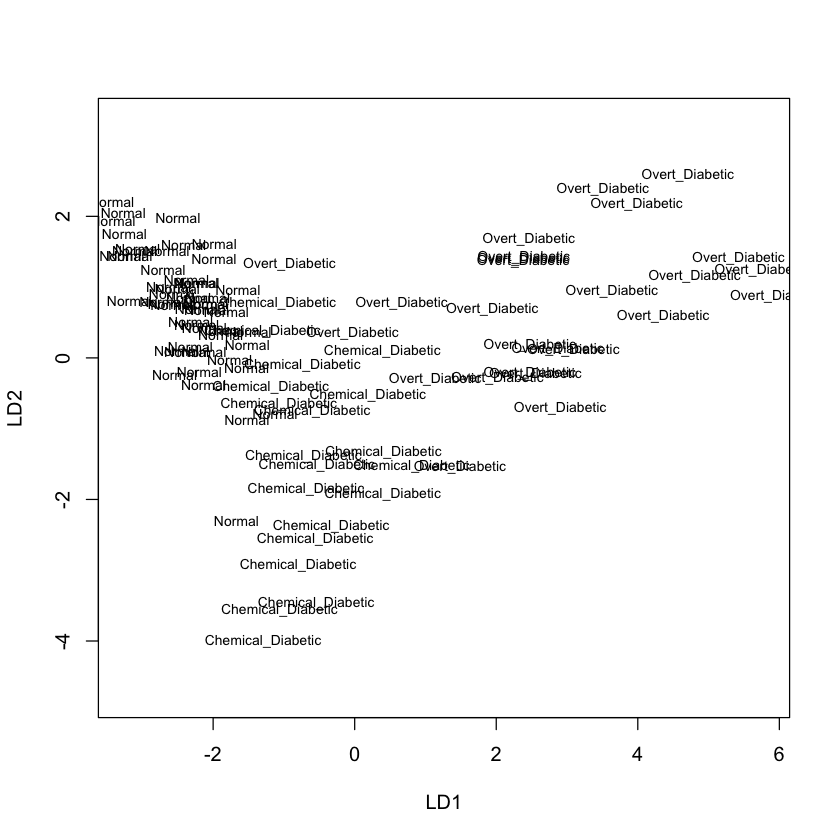

In [290]:
plot(lda.fit)




In [291]:
# make predictions for the test and training.


In [292]:
# compute the error rates



In [293]:
lda.fit<-lda(group~.,data=dib_train)

lda.pred.test<-predict(lda.fit,newdata = dib_test)


y_hat_test <- as.numeric(lda.pred.test$class)

y_true_test=dib_test$group

y_true_test<-as.numeric(y_true_test)
lda_test_error <- sum(abs(y_true_test - y_hat_test))/length(y_true_test)

lda_test_error

[1] 0.1458333

In [294]:
lda.pred.test

,Normal,Chemical_Diabetic,Overt_Diabetic
1,9.980350e-01,1.963993e-03,9.782852e-07
2,9.998164e-01,1.836144e-04,6.126239e-09
5,9.855000e-01,1.449974e-02,2.203380e-07
11,9.942115e-01,5.788326e-03,1.544265e-07
17,9.501421e-01,4.985314e-02,4.791964e-06
18,9.990720e-01,9.279550e-04,4.431968e-08
19,9.998225e-01,1.774653e-04,1.607108e-08
20,9.979961e-01,2.003555e-03,2.977409e-07
24,9.942629e-01,5.736897e-03,2.398360e-07
28,9.731000e-01,2.689859e-02,1.440315e-06


### QDA

In [295]:
qda.fit<-qda(group~.,data=dib_train)

qda.pred.test<-predict(qda.fit,newdata = dib_test)

y_hat_test <- as.numeric(qda.pred.test$class)

y_true_test=dib_test$group

y_true_test<-as.numeric(y_true_test)

qda_test_error <- sum(abs(y_true_test - y_hat_test))/length(y_true_test)

qda_test_error


[1] 0.08333333

#### As we can see QDA performes way better than LDA

#### c) Suppose an individual has (glucose test/intolerence= 68, insulin test=122, SSPG = 544. Relative weight = 1.86, fasting plasma glucose = 184). To which class does LDA assign this individual? To which class does QDA?

In [296]:
X<-data.frame(0,1.86,184,68,122,544,NA)

colnames(X)<-c("obs_number","relwt","glufast","glutest","instest","sspg","class")



In [297]:
lda.pred.y<-predict(lda.fit,newdata = X)

In [298]:
lda.pred.y

$class
[1] Normal
Levels: Normal Chemical_Diabetic Overt_Diabetic

$posterior
     Normal Chemical_Diabetic Overt_Diabetic
1 0.9999958      4.159043e-06    4.01077e-14

$x
        LD1      LD2
1 -4.968625 1.136213

In [299]:
qda.pred.y<-predict(qda.fit,newdata = X)

In [300]:
qda.pred.y

,Normal,Chemical_Diabetic,Overt_Diabetic
1,2.121318e-46,2.063752e-35,1


### According to LDA the person is Normal and QDA says the person is Overt_Diabetic

#### d) Apply RDA (regularized discriminant analysis). What is the optimal value of α in this case? Does this support your observations about the covariance matrices in (a).


In [303]:
alpha = seq(from = 0, to = 1, by = .1)
err_store <- c()
for (i in 1:length(alpha)){
	rda_fit <- rda(group~., data = dib_train, regularization = c(gamma=0, lambda=alpha[i]))
	y_hat_test <- predict(rda_fit, newdata=dib_test)$class
	err <- (1/length(y_hat_test))*length(which(y_hat_test != dib_test$group))
	err_store <- c(err_store, err)
}


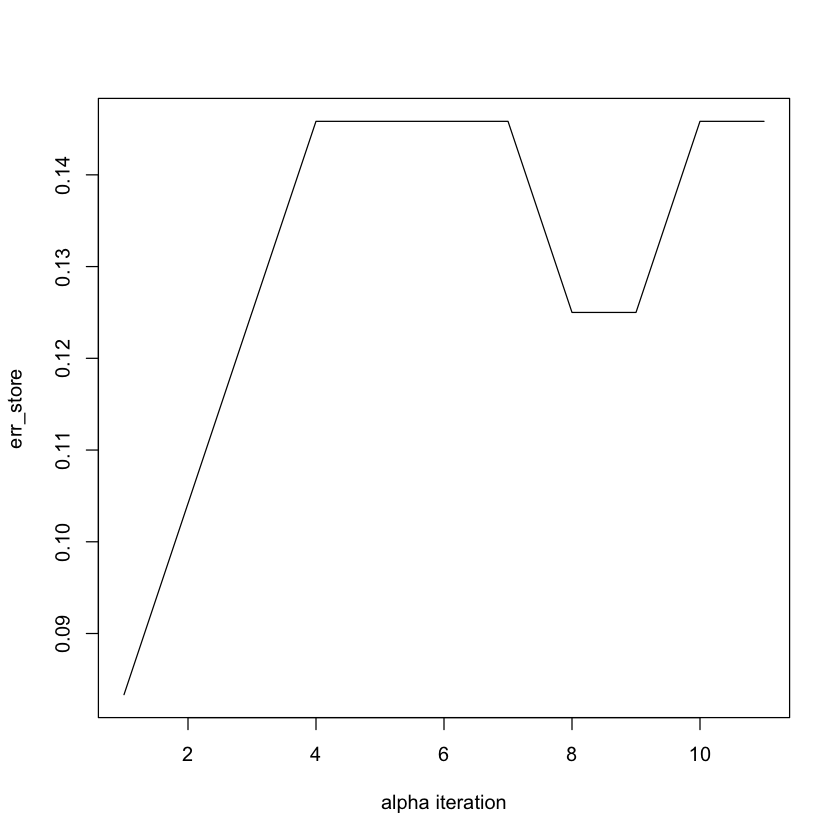

In [304]:
plot(err_store, type = "l", xlab = "alpha iteration")


In [305]:
### Here optimal alpha is 0

### 3. This problem concerns the Boston data set (ISLR2 package).(a) Fit classification models in order to predict whether a given census tract has a high or low crime rates.Explore logistic regression, LDA, QDA and KNN models using various subsets of the predictors. Describe your findings.

In [36]:
library(ISLR2)


Attaching package: ‘ISLR2’


The following object is masked from ‘package:MASS’:

    Boston




In [37]:
data(Boston)

In [38]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [39]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [40]:
attach(Boston) # attach() function in R Language is used to access the variables present in the data framework without calling the data frame

In [41]:
### Creating binary crim variable.

In [42]:
crime01 <- rep(0, length(crim))
crime01[crim > median(crim)] <- 1
Boston= data.frame(Boston,crime01)

In [43]:
## Splitting the dataset

In [44]:
train = 1:(dim(Boston)[1]/2)
test = (dim(Boston)[1]/2 + 1):dim(Boston)[1]
Boston.train = Boston[train, ]
Boston.test = Boston[test, ]
crime01.test = crime01[test]

corrplot 0.92 loaded



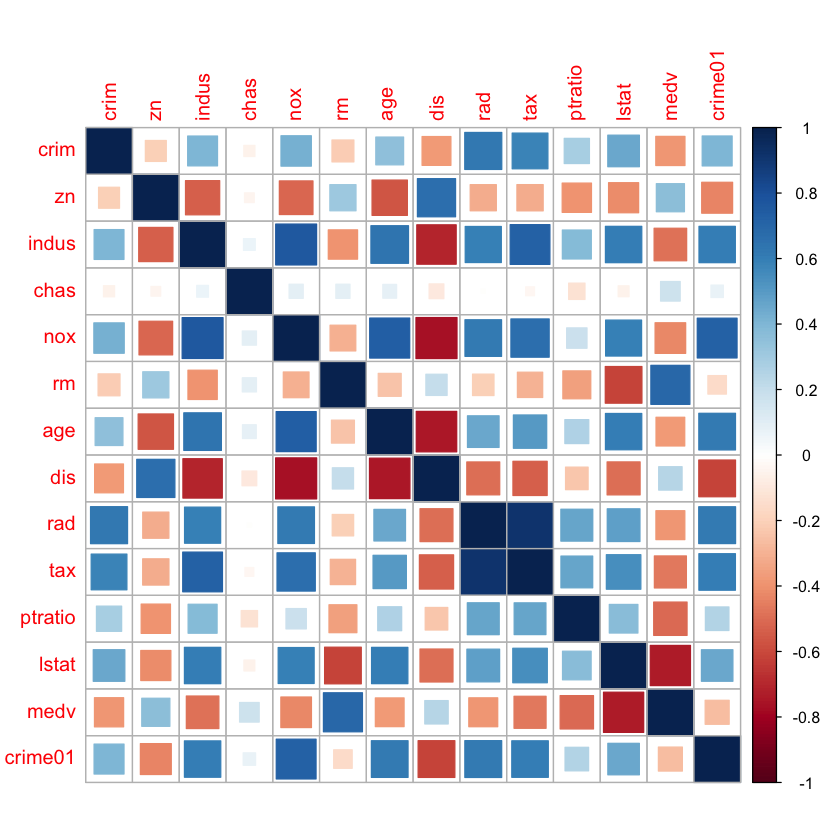

In [45]:
library(corrplot)
corrplot(cor(Boston), method="square")

In [48]:
#Logistic Regression

In [49]:
set.seed(123)
Boston.fit <-glm(crime01~ indus+nox+age+dis+rad+tax, data=Boston.train,family=binomial)
Boston.probs = predict(Boston.fit, Boston.test, type = "response")
Boston.pred = rep(0, length(Boston.probs))
Boston.pred[Boston.probs > 0.5] = 1
table(Boston.pred, crime01.test)

           crime01.test
Boston.pred   0   1
          0  75   8
          1  15 155

In [50]:
mean(Boston.pred != crime01.test)

[1] 0.09090909

In [51]:
summary(Boston.fit)


Call:
glm(formula = crime01 ~ indus + nox + age + dis + rad + tax, 
    family = binomial, data = Boston.train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.97810  -0.21406  -0.03454   0.47107   3.04502  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -42.214032   7.617440  -5.542 2.99e-08 ***
indus        -0.213126   0.073236  -2.910  0.00361 ** 
nox          80.868029  16.066473   5.033 4.82e-07 ***
age           0.003397   0.012032   0.282  0.77772    
dis           0.307145   0.190502   1.612  0.10690    
rad           0.847236   0.183767   4.610 4.02e-06 ***
tax          -0.013760   0.004956  -2.777  0.00549 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 329.37  on 252  degrees of freedom
Residual deviance: 144.44  on 246  degrees of freedom
AIC: 158.44

Number of Fisher Scoring iterations: 8


In [52]:
## Linear Discriminat Analysis

In [53]:
Boston.ldafit <-lda(crime01~ indus+nox+age+dis+rad+tax, data=Boston.train,family=binomial)
Bostonlda.pred = predict(Boston.ldafit, Boston.test)
table(Bostonlda.pred$class, crime01.test)

   crime01.test
      0   1
  0  81  18
  1   9 145

In [54]:
mean(Bostonlda.pred$class != crime01.test)

[1] 0.1067194

In [55]:
#K Nearest Neighbors

In [58]:
library(class)
train.K=cbind(indus,nox,age,dis,rad,tax)[train,]
test.K=cbind(indus,nox,age,dis,rad,tax)[test,]
Bosknn.pred=knn(train.K, test.K, crime01.test, k=1)
table(Bosknn.pred,crime01.test)

           crime01.test
Bosknn.pred   0   1
          0  31 155
          1  59   8

In [59]:
mean(Bosknn.pred !=crime01.test)

[1] 0.8458498

In [60]:
#K=100
train.K=cbind(indus,nox,age,dis,rad,tax)[train,]
test.K=cbind(indus,nox,age,dis,rad,tax)[test,]
Bosknn.pred=knn(train.K, test.K, crime01.test, k=100)
table(Bosknn.pred,crime01.test)

           crime01.test
Bosknn.pred   0   1
          0  20   7
          1  70 156

In [61]:
mean(Bosknn.pred !=crime01.test)

[1] 0.3043478

##### After reviewing the results of each classification method, logistic regression had the lowest test error rate of 9.09%.Closely reveiwing the logistic regression model, the only variables that were statistically significant were: indus, nox, rad and tax. All of the modeling methods contained the same variables so comparison would be the easiest; these variables were determined graphically to has the best association with crime01. K nearest neighbors with k=1 had the highest error rate (84.58%), thus making that model ineffective in classification. To also note, as the value of K increased the error rate did improve but still wasn’t as low as logistic regression or LDA.

#### b) Fit classification models in order to predict whether a given census tract has a high, medium or low crime rates. Explore logistic regression, LDA, QDA, and KNN models using various subsets of the predictors. Describe your findings.

In [63]:
data(Boston)

In [64]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [65]:
attach(Boston)

The following objects are masked from Boston (pos = 5):

    age, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad, rm,
    tax, zn




In [67]:
summary(crim)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00632  0.08204  0.25651  3.61352  3.67708 88.97620 

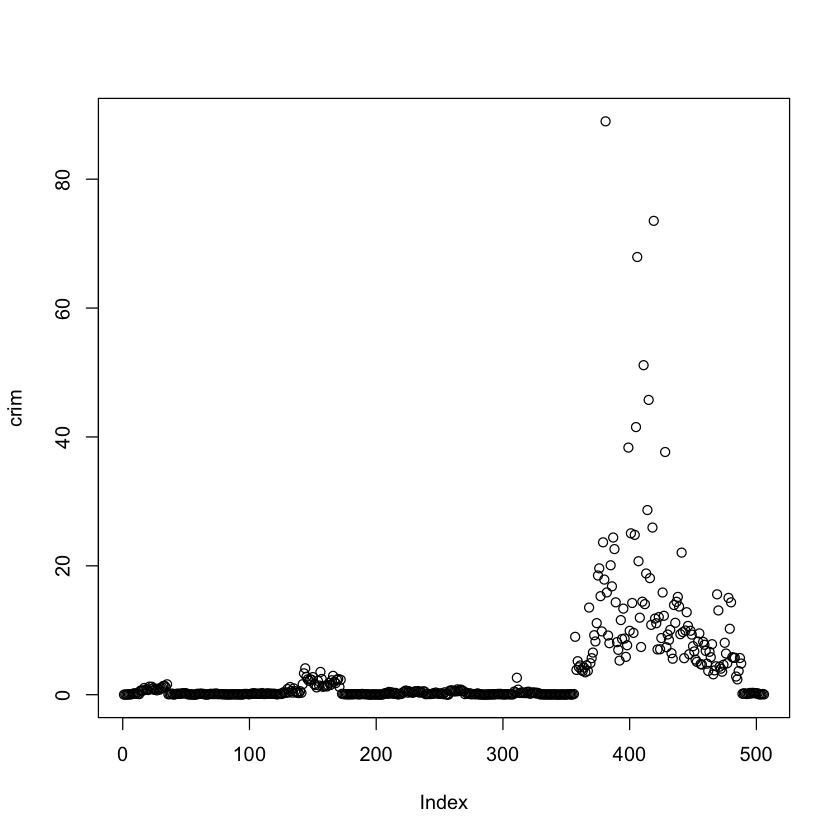

In [68]:
plot(crim)

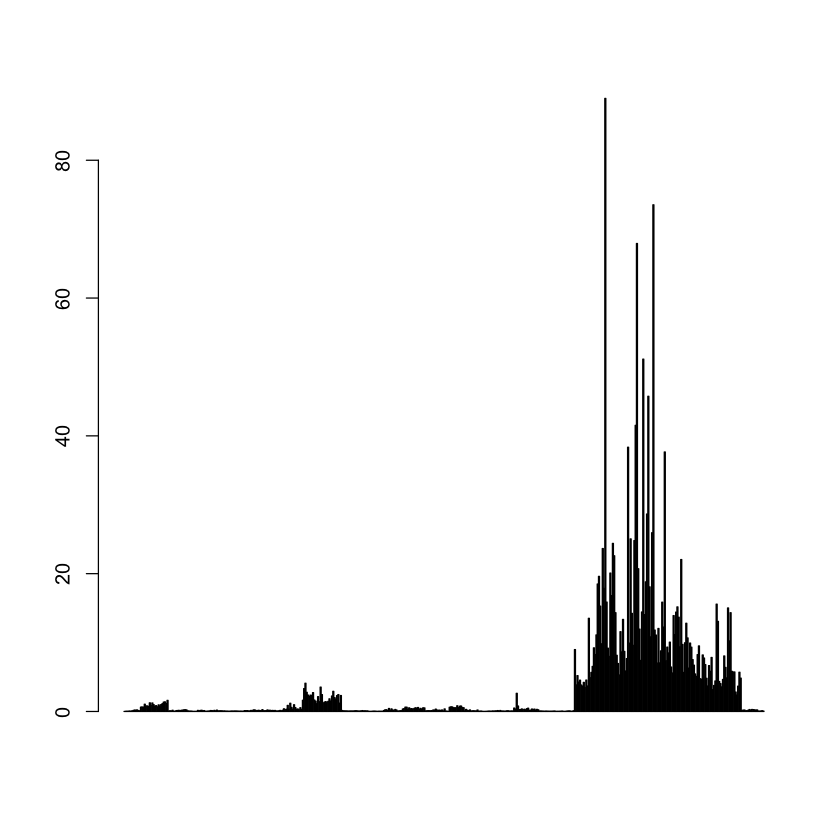

In [71]:
crime01 <- rep(0, length(crim))
crime01[crim > median(crim)] <- 1
crime01[crim>mean(crim)] <-2
Boston= data.frame(Boston,crime01)

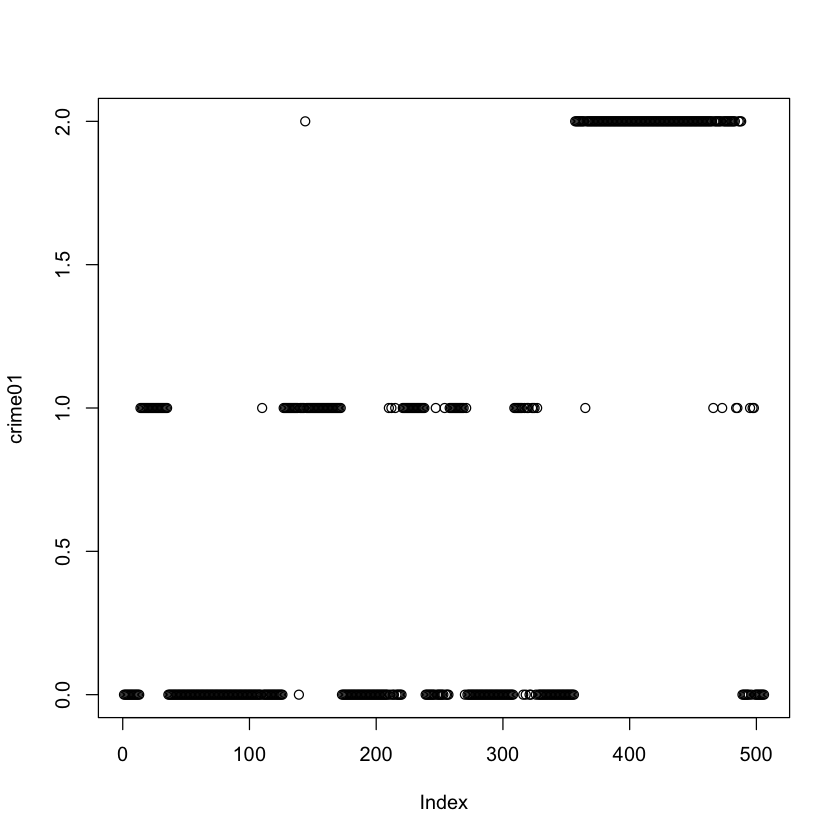

In [74]:
plot(crime01)

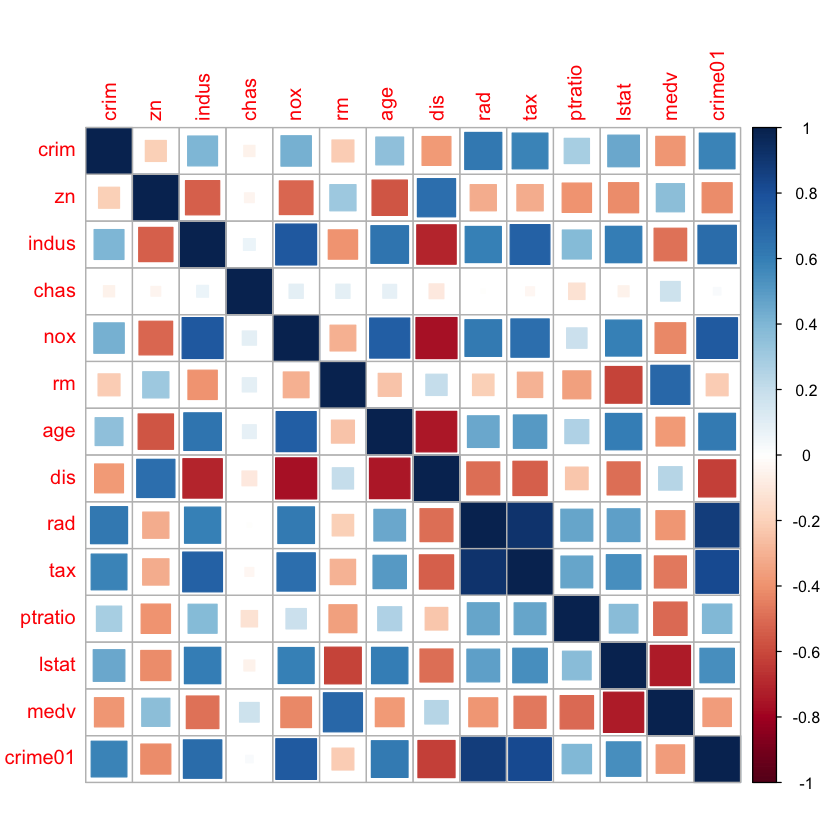

In [75]:
corrplot(cor(Boston), method="square")

In [76]:
## indus + nox + age + dis rad +tax +lstat

In [78]:
train = 1:(dim(Boston)[1]/2)
test = (dim(Boston)[1]/2 + 1):dim(Boston)[1]
Boston.train = Boston[train, ]
Boston.test = Boston[test, ]
crime01.test = crime01[test]

In [83]:
## Linear Discriminat Analysis

In [91]:
Boston.ldafit <-lda(crime01~ indus+nox+age+dis+rad+tax+lstat, data=Boston.train,family=binomial)
Bostonlda.pred = predict(Boston.ldafit, Boston.test)
table(Bostonlda.pred$class, crime01.test)

   crime01.test
      0   1   2
  0  81  18   0
  1   9  18 126
  2   0   0   1

In [92]:
mean(Bostonlda.pred$class != crime01.test)

[1] 0.6047431

In [90]:
#QDA

In [85]:
#K Nearest Neighbors

In [96]:
library(class)
train.K=cbind(indus,nox,age,dis,rad,tax,lstat)[train,]
test.K=cbind(indus,nox,age,dis,rad,tax,lstat)[test,]
Bosknn.pred=knn(train.K, test.K, crime01.test, k=3)
table(Bosknn.pred,crime01.test)

           crime01.test
Bosknn.pred   0   1   2
          0  35  20   0
          1  23   8   0
          2  32   8 127

In [97]:
mean(Bosknn.pred !=crime01.test)

[1] 0.3280632

In [98]:
library(class)
train.K=cbind(indus,nox,age,dis,rad,tax,lstat)[train,]
test.K=cbind(indus,nox,age,dis,rad,tax,lstat)[test,]
Bosknn.pred=knn(train.K, test.K, crime01.test, k=100)
table(Bosknn.pred,crime01.test)

           crime01.test
Bosknn.pred   0   1   2
          0  65  28   0
          1   0   0   0
          2  25   8 127

In [99]:
mean(Bosknn.pred !=crime01.test)

[1] 0.2411067

In [109]:
##Logistic Regression

In [101]:
crime01<- factor(crime01)
mylogit <- glm(crime01 ~ indus+nox+age+dis+rad+tax+lstat, family = "binomial")

In [102]:
summary(mylogit)


Call:
glm(formula = crime01 ~ indus + nox + age + dis + rad + tax + 
    lstat, family = "binomial")

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.02820  -0.27209  -0.01361   0.00667   2.73502  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -24.512019   3.744366  -6.546 5.90e-11 ***
indus        -0.057053   0.043005  -1.327  0.18462    
nox          42.095213   6.917258   6.086 1.16e-09 ***
age           0.014095   0.009481   1.487  0.13709    
dis           0.208434   0.149595   1.393  0.16352    
rad           0.596847   0.117259   5.090 3.58e-07 ***
tax          -0.007241   0.002377  -3.046  0.00232 ** 
lstat        -0.002425   0.033635  -0.072  0.94251    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 701.46  on 505  degrees of freedom
Residual deviance: 244.76  on 498  degrees of freedom
AIC: 260.76

Number of Fisher 

In [103]:
Boston.probs = predict(mylogit, Boston.test, type = "response")

In [104]:
Boston.probs

254          255          256          257          258          259 
0.0497984367 0.0005281800 0.0004375523 0.0017938856 0.9942769927 0.9952987079 
         260          261          262          263          264          265 
0.9954204446 0.9941743193 0.9948222168 0.9951410198 0.9950710201 0.9947457566 
         266          267          268          269          270          271 
0.9921826209 0.9943522109 0.8775996640 0.8665945251 0.0278991993 0.0237503022 
         272          273          274          275          276          277 
0.0168860168 0.0272262376 0.0272028676 0.0146588394 0.0175064309 0.0210575235 
         278          279          280          281          282          283 
0.0159767301 0.0145568614 0.0341893357 0.0595625927 0.0460230117 0.0542533878 
         284          285          286          287          288          289 
0.0009394842 0.0005456263 0.0003750488 0.0007118684 0.0126354521 0.0153967339 
         290          291          292          293          294          295 
0.0111767168 0.0043713029 0.0043566304 0.0040901884 0.0053229115 0.0074067411 
         296          297          298          299          300          301 
0.0070309156 0.0092613646 0.0107773465 0.0040419067 0.0035093988 0.0059119474 
         302          303          304          305          306          307 
0.0412656851 0.0306596072 0.0306410073 0.3108339093 0.3323999625 0.3650967423 
         308          309          310          311          312          313 
0.3633092341 0.4631602862 0.4286495122 0.2761399681 0.3293988024 0.4614605182 
         314          315          316          317          318          319 
0.4593527941 0.4919750200 0.4746783591 0.4926900913 0.4554574829 0.4176106781 
         320          321          322          323          324          325 
0.4112256580 0.1668660732 0.1709355139 0.1672309280 0.2190433313 0.1493530639 
         326          327          328          329          330          331 
0.1245133795 0.1476935879 0.1736038640 0.0096318507 0.0085958435 0.0120889809 
         332          333          334          335          336          337 
0.0018803373 0.0017697388 0.5256119107 0.5263706053 0.4868861509 0.4880814771 
         338          339          340          341          342          343 
0.5542755193 0.4356768218 0.4631826656 0.5095502385 0.0049481987 0.0412215707 
         344          345          346          347          348          349 
0.1114261820 0.0898000095 0.0100872109 0.0105818572 0.0091018256 0.0216230502 
         350          351          352          353          354          355 
0.0023550102 0.0027061307 0.0056471900 0.0043998579 0.0622347779 0.0083987156 
         356          357          358          359          360          361 
0.0081702139 0.9999999868 0.9999999868 0.9999999860 0.9999999849 0.9999999864 
         362          363          364          365          366          367 
0.9999999862 0.9999999868 0.9999999846 0.9999998532 0.9999998540 0.9999998627 
         368          369          370          371          372          373 
0.9999950256 0.9999949621 0.9999947502 0.9999946418 0.9999947076 0.9999987005 
         374          375          376          377          378          379 
0.9999988160 0.9999987975 0.9999990091 0.9999989237 0.9999990115 0.9999989745 
         380          381          382          383          384          385 
0.9999990325 0.9999989342 0.9999990486 0.9999997247 0.9999997213 0.9999996735 
         386          387          388          389          390          391 
0.9999997028 0.9999997149 0.9999996700 0.9999997205 0.9999997307 0.9999997370 
         392          393          394          395          396          397 
0.9999996919 0.9999997225 0.9999996153 0.9999996247 0.9999996410 0.9999996206 
         398          399          400          401          402          403 
0.9999996320 0.9999996169 0.9999994781 0.9999996282 0.9999996328 0.9999996378 
         404          405          406          407        

In [105]:
Boston.pred = rep(0, length(Boston.probs))
Boston.pred[Boston.probs > 0.5] = 1
Boston.pred[Boston.probs > 0.7] = 2

In [106]:
Boston.pred

[1] 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0

In [107]:
table(Boston.pred, crime01.test)

           crime01.test
Boston.pred   0   1   2
          0  81  16   0
          1   4   0   0
          2   5  20 127

In [108]:
mean(Boston.pred != crime01.test)

[1] 0.1778656